In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
import seaborn as sns
sns.set_style("whitegrid")
import pandas as pd
import random

In [5]:
heights = pd.read_csv("../data/reported_height_nums.csv")

display(heights.head())
heights.height.median() * 2.54

,Unnamed: 0,Unnamed: 0.1,time_stamp,sex,height
0,0,0,2014-09-02 13:40:36,Male,75.0
1,1,1,2014-09-02 13:46:59,Male,70.0
2,2,2,2014-09-02 13:59:20,Male,68.0
3,3,3,2014-09-02 14:51:53,Male,74.0
4,4,4,2014-09-02 15:16:15,Male,61.0


175.26

<AxesSubplot:ylabel='height'>

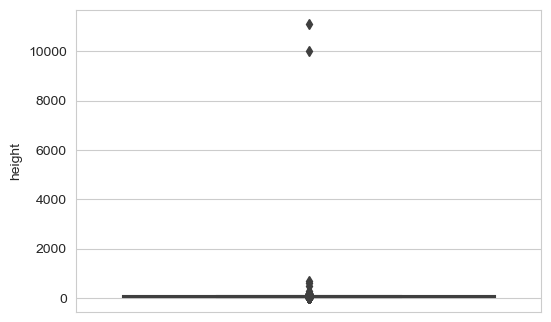

In [239]:
sns.boxplot(data=heights, y="height")

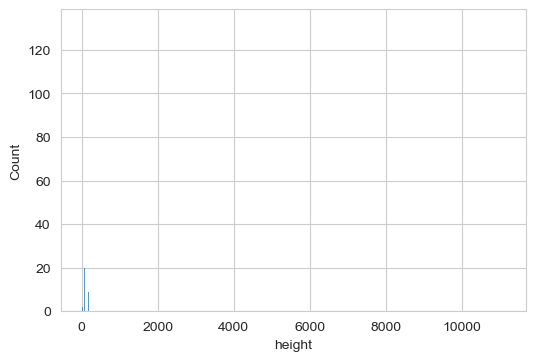

In [6]:
sns.histplot(data=heights, x="height")

In [7]:
heights = heights[heights.height < 100]
heights = heights[heights.height > 40]

<AxesSubplot:xlabel='height', ylabel='Count'>

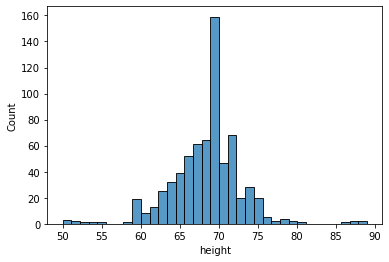

In [106]:
sns.histplot(data=heights, x="height")

In [11]:
import numpy as np

In [12]:
penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


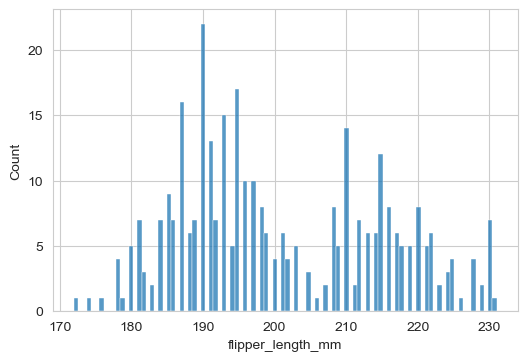

In [13]:
sns.histplot(data=penguins, x="flipper_length_mm", bins=100)

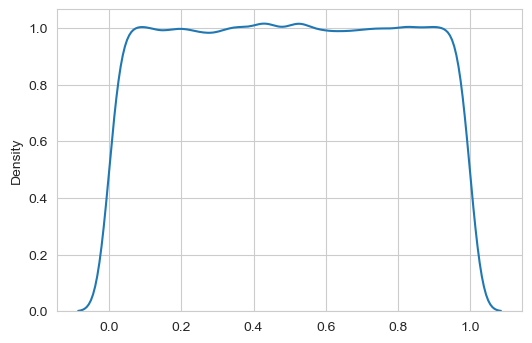

In [14]:
x = np.random.rand(100000)
# sns.histplot(x, bins=100)
sns.kdeplot(x)

A normal (Gaussian) distribution (we'll learn exactly what it means...) with mean $\mu$ and standard deviation $\sigma$ has a density
$$
    p(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

In [15]:
def std_gauss(t):
    return np.exp(-t**2 / 2) / np.sqrt(np.pi * 2)

def mykde(data, t, sig):
    kd = np.zeros((len(data), len(t)))
    for i, x in enumerate(data):
        kd[i] = std_gauss((t - x) / sig) / sig

    return kd / len(data)

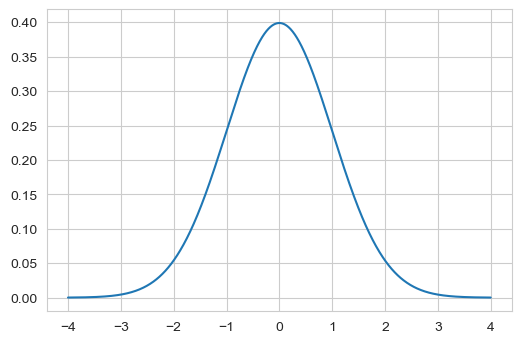

In [16]:
t = np.linspace(-4, 4, 1000)

plt.plot(t, std_gauss(t))

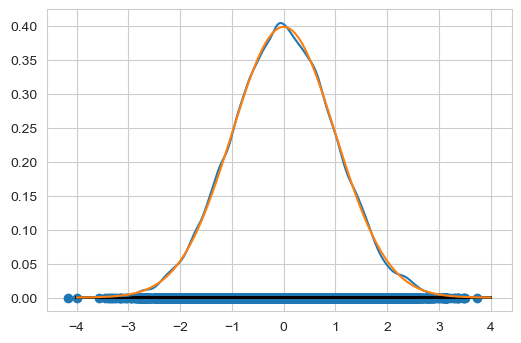

In [17]:
n_points = 15000
sig = 0.1


dat = np.random.randn(n_points)
density = mykde(dat, t, sig)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.scatter(dat, 0*np.zeros(dat.shape))
_ = ax.plot(t, density.T, "k")
ax.plot(t, density.sum(axis=0))
ax.plot(t, std_gauss(t))

0.43


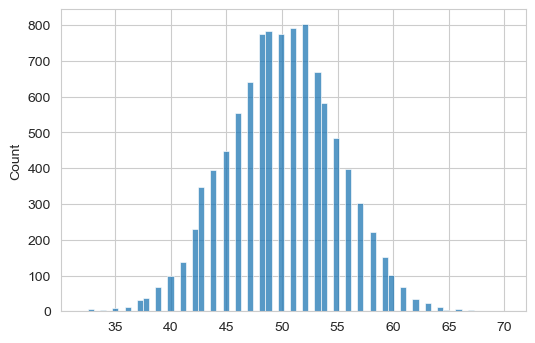

In [19]:
# Tossing a coin (slow code; fast code example below)

import random

n_games = 10000
n_tosses = 100

tails_per_game = []
for i_game in range(n_games):
    n_tails = 0
    for i in range(n_tosses):
        toss = random.randint(0, 1)
        n_tails += 1 if toss == 0 else 0
    tails_per_game.append(n_tails)
        
sns.histplot(tails_per_game)

print(tails_per_game[0] / n_tosses)


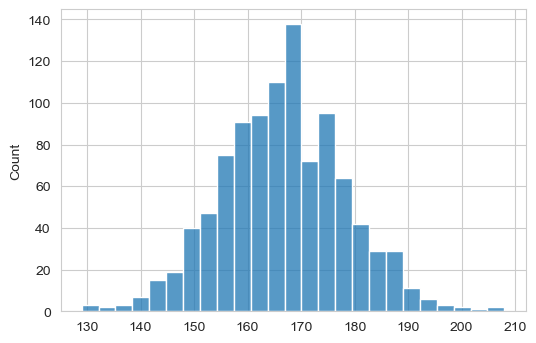

In [20]:
# Rolling a die

import random

n_games = 1000
n_rolls = 1000

fours_per_game = []
for i_game in range(n_games):
    n_fours = 0
    for i in range(n_rolls):
        roll = random.randint(1, 6)
        n_fours += 1 if roll == 4 else 0
    fours_per_game.append(n_fours)
        
sns.histplot(fours_per_game)

# The average number of fours in a hundred rolls is about 16.
# That looks about right, since we "expect" to see about 100/6 = 16 + 2/3
# fours. But we see that in a 1000 games the number ranges between 
# as low as 5 and as high as 29

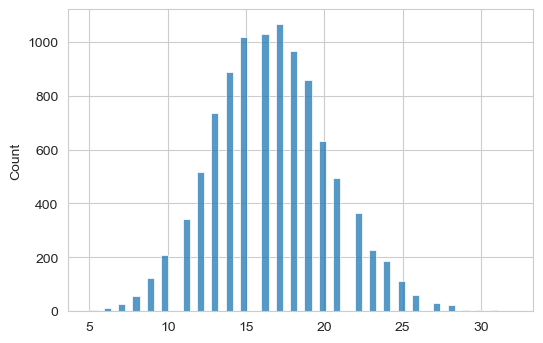

In [21]:
n_games = 10000
n_rolls = 100

games = np.random.randint(1, 6 + 1, size=(n_games, n_rolls))
sns.histplot((games == 4).sum(axis=1))

[0.   0.01 0.   0.01 0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.01
 0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.
 0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.01 0.
 0.   0.01 0.   0.   0.01 0.   0.   0.01 0.   0.   0.   0.   0.   0.01
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.01
 0.   0.  ]
0.16000000000000003


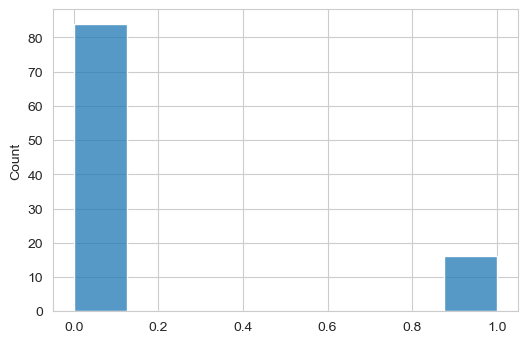

In [22]:
# a quick Ber(p) random variable generator
def randber(shape, p=0.5):
    u = np.random.rand(*shape)
    u[u < 1 - p] = 0
    u[u >= 1 - p] = 1

    return np.int64(u)


n = 100
p = 0.2
handedness = randber((n,), p)
sns.histplot(handedness)

print(handedness / n)
print((handedness / n).sum())

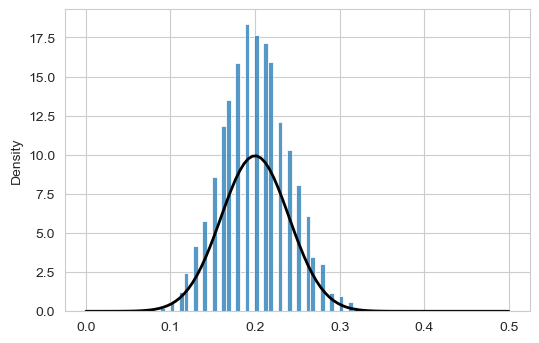

In [24]:
n_experiments = 10000
n = 100

handedness = randber((n_experiments, n), 0.2)

sns.histplot(handedness.mean(axis=1), stat='density')

avg = handedness.mean()
stderr = handedness.mean(axis=1).std()

x = np.linspace(0, 0.5, 100)
plt.plot(x, 
         np.exp(-(x - avg)**2 / (2*stderr**2)) / (np.sqrt(2*np.pi)*stderr),
         'k', linewidth=2
        )

# imagine that we ran the experiment when mother nature was 
# handing out the values on the left or on the right!
# -> motivation for the "right" definition of confidence intervals!
